# Midpoint time completeness test

Time completeness test using the APPL stock to see which are the differences of each approximation?

In [1]:
# Import modules

from matplotlib import pyplot as plt
import numpy as np
import pickle

%matplotlib inline

In [2]:
ticker = 'AAPL'
day = '07'

In [3]:
# Load data

print('Processing data for the stock', ticker, 'the day', day + ' March, 2016')

midpoint = pickle.load(open('../Data/midpoint_data/midpoint_test%s_%s.pickl' % (day,ticker), 'rb'))
time = pickle.load(open('../Data/midpoint_data/time_test%s_%s.pickl' % (day,ticker), 'rb'))

Processing data for the stock AAPL the day 07 March, 2016


In [5]:
day_times_ind = (1. * time / 3600 / 1000 > 9.5) * (1. * time / 3600 / 1000 < 16) > 0 # This line behaves as an or.
                                                           # The two arrays must achieve a condition, in this case, be
                                                           # in the market trade hours
midpoint = midpoint[day_times_ind]                        # Midpoint in the market trade hours
time = 1. * time[day_times_ind]    # Time converted to hours in the market trade hours

In [12]:
len(time)

47030

In [6]:
new_time = np.array(range(34200000,57600000))

In [7]:
midpoint_first_val = 0. * new_time
midpoint_first_val[-1] = midpoint[0]

midpoint_last_val = 0. * new_time
midpoint_last_val[-1] = midpoint[0]

midpoint_max_val = 0. * new_time
midpoint_max_val[-1] = midpoint[0]

midpoint_min_val = 0. * new_time
midpoint_min_val[-1] = midpoint[0]

midpoint_avg_val = 0. * new_time
midpoint_avg_val[-1] = midpoint[0]

In [17]:
count = 0

for t_idx, t_val in enumerate(new_time):
    
    if (count < len(time) and t_val == time[count]):
        
        avg_count = 0
        avg = 0
        
        midpoint_first_val[t_idx] = midpoint[count]
        midpoint_max_val[t_idx] = midpoint[count]
        midpoint_min_val[t_idx] = midpoint[count]
        
        avg_count += 1
        avg += midpoint[count]
        
        count += 1
        
        while (count < len(time) and time[count - 1] == time[count]):
            
            midpoint_max_val[t_idx] = max(midpoint_max_val[t_idx - 1], midpoint[count])
            midpoint_min_val[t_idx] = min(midpoint_min_val[t_idx - 1], midpoint[count])
            
            assert midpoint_max_val[t_idx] != 0, ('The value can not be 0, \nt_idx: %d, \nt_val: %d, \ncount: %d, \
                                                   \nmidpoint value: %f, \nmidpoint value before: %f, \ncurrent value %f' \
                                                   %(t_idx, t_val, count, midpoint[count], midpoint[count - 1], \
                                                   midpoint_max_val[t_idx]))
            assert midpoint_min_val[t_idx] != 0, ('The value can not be 0, \nt_idx: %d, \nt_val: %d, \ncount: %d, \
                                                   \nmidpoint value: %f, \nmidpoint value before: %f, \ncurrent value %f \
                                                   \nprevious value: %f '
                                                   %(t_idx, t_val, count, midpoint[count], midpoint[count - 1], \
                                                   midpoint_min_val[t_idx], midpoint_min_val[t_idx - 1]))
            
            avg_count += 1
            avg += midpoint[count]
            
            count += 1
            
        midpoint_avg_val[t_idx] = 1. * avg / avg_count
        if (count < len(time)): midpoint_last_val[t_idx] = midpoint[count]
                   
    else:
        
        midpoint_first_val[t_idx] = midpoint_first_val[t_idx - 1]
        midpoint_last_val[t_idx] = midpoint_last_val[t_idx - 1]
        midpoint_max_val[t_idx] = midpoint_max_val[t_idx - 1]
        midpoint_min_val[t_idx] = midpoint_min_val[t_idx - 1]
        midpoint_avg_val[t_idx] = midpoint_avg_val[t_idx - 1]

In [ ]:
new_time = new_time[new_day_times_ind] / 3600 / 1000
midpoint_first_val = midpoint_first_val[new_day_times_ind]
midpoint_last_val = midpoint_last_val[new_day_times_ind]
midpoint_max_val = midpoint_max_val[new_day_times_ind]
midpoint_min_val = midpoint_min_val[new_day_times_ind]
midpoint_avg_val = midpoint_avg_val[new_day_times_ind]

assert len(new_time) == len(midpoint_first_val) and len(new_time) == len(midpoint_max_val) and len(new_time) == len(midpoint_min_val) and len(new_time) == len(midpoint_avg_val)

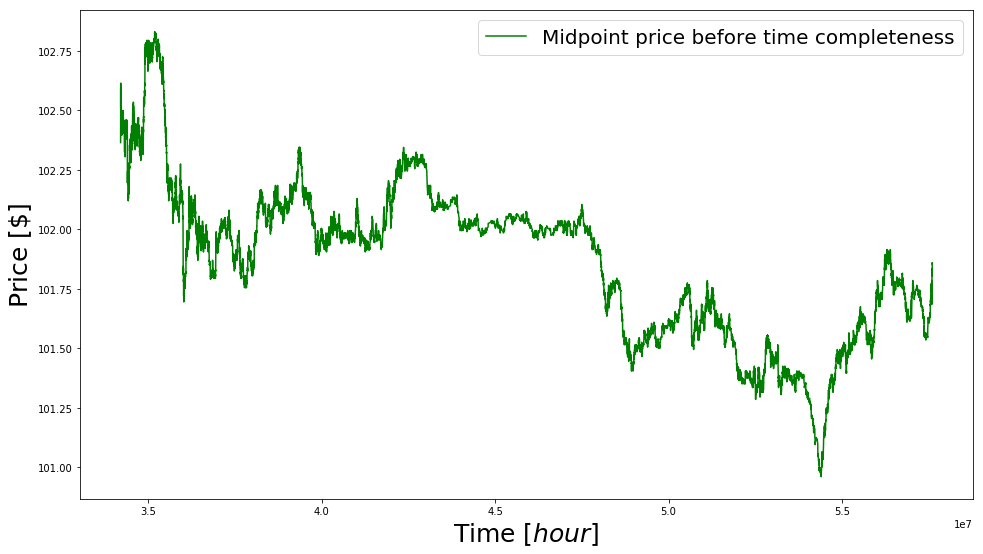

In [20]:
figure1 = plt.figure(figsize=(16,9))
plot1 = plt.plot(time, midpoint, '-g', label='Midpoint price before time completeness')
plt.xlabel(r'Time $[hour]$', fontsize=25)
plt.ylabel(r'Price $ [\$] $', fontsize=25)
plt.legend(loc='best', fontsize=20)

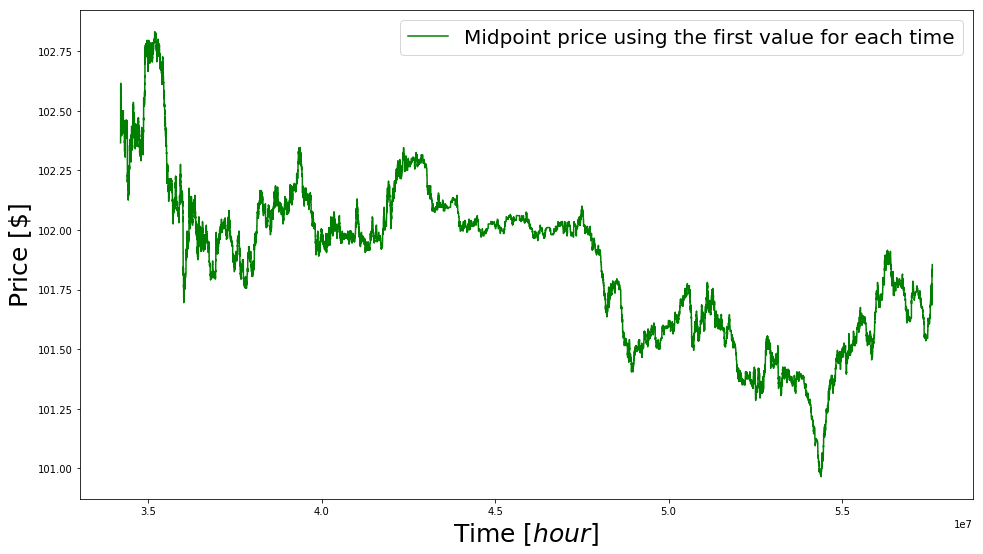

In [18]:
figure2 = plt.figure(figsize=(16,9))
plot2 = plt.plot(new_time, midpoint_first_val, '-g', label='Midpoint price using the first value for each time')
plt.xlabel(r'Time $[hour]$', fontsize=25)
plt.ylabel(r'Price $ [\$] $', fontsize=25)
plt.legend(loc='best', fontsize=20)

figure3 = figure(figsize=(16,9))
plot3 = plot(new_time, midpoint_last_val, '-g', label='Midpoint price using the last value for each time')
xlabel(r'Time $[hour]$', fontsize=25)
ylabel(r'Price $ [\$] $', fontsize=25)
legend(loc='best', fontsize=20)

figure4 = figure(figsize=(16,9))
plot4 = plot(new_time, midpoint_max_val, '-g', label='Midpoint price using the max value for each time')
xlabel(r'Time $[hour]$', fontsize=25)
ylabel(r'Price $ [\$] $', fontsize=25)
legend(loc='best', fontsize=20)

figure5 = figure(figsize=(16,9))
plot5 = plot(new_time, midpoint_min_val, '-g', label='Midpoint price using the min value for each time')
xlabel(r'Time $[hour]$', fontsize=25)
ylabel(r'Price $ [\$] $', fontsize=25)
legend(loc='best', fontsize=20)

figure6 = figure(figsize=(16,9))
plot6 = plot(new_time, midpoint_avg_val, '-g', label='Midpoint price using the average value for each time')
xlabel(r'Time $[hour]$', fontsize=25)
ylabel(r'Price $ [\$] $', fontsize=25)
legend(loc='best', fontsize=20)

In [ ]:
plt.figure(figsize=(16,9))
plt.subplots_adjust(hspace = 0, wspace = 0)

ax1 = plt.subplot(321)
plot1 = plt.plot(time, midpoint, '-g', label='Midpoint price before time completeness')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel(r'Price $ [\$] $', fontsize=15)
plt.legend(loc='best', fontsize=10)

ax2 = plt.subplot(322)
plot2 = plt.plot(new_time, midpoint_first_val, '-g', label='Midpoint price using the first value for each time')
plt.setp(ax2.get_xticklabels(), visible = False)
plt.setp(ax2.get_yticklabels(), visible = False)
plt.legend(loc='best', fontsize=10)

ax3 = plt.subplot(323)
plot3 = plt.plot(new_time, midpoint_last_val, '-g', label='Midpoint price using the last value for each time')
plt.setp(ax3.get_xticklabels(), visible = False)
plt.ylabel(r'Price $ [\$] $', fontsize=15)
plt.legend(loc='best', fontsize=10)

ax4 = plt.subplot(324)
plot4 = plt.plot(new_time, midpoint_max_val, '-g', label='Midpoint price using the max value for each time')
plt.setp(ax4.get_xticklabels(), visible = False)
plt.setp(ax4.get_yticklabels(), visible = False)
plt.legend(loc='best', fontsize=10)

ax5 = plt.subplot(325)
plot5 = plt.plot(new_time, midpoint_min_val, '-g', label='Midpoint price using the min value for each time')
plt.xlabel(r'Time $[hour]$', fontsize=15)
plt.ylabel(r'Price $ [\$] $', fontsize=15)
plt.legend(loc='best', fontsize=10)

ax6 = plt.subplot(326)
plot6 = plt.plot(new_time, midpoint_avg_val, '-g', label='Midpoint price using the average value for each time')
plt.xlabel(r'Time $[hour]$', fontsize=15)
plt.setp(ax6.get_yticklabels(), visible = False)
plt.legend(loc='best', fontsize=10)

plt.tight_layout()

plt.savefig('midpoint_time_completeness.png')